In [7]:
import pandas as pd

In [8]:
final = pd.read_excel("FGR_data_para_proyecto_final_clean.xlsx")
final.head()

,Age,BMI,gestational age of delivery (weeks),Gravidity,Parity,initial onset symptoms (IOS),gestational age of IOS onset (weeks),interval from IOS onset to delivery (days),gestational age of hypertension onset (weeks),interval from hypertension onset to delivery (days),...,Fetal weight,maximum values of creatinine,Maximum uric acid value,Maximum proteinuria value,Maximum total protein value,Maximum albumin value,Maximum ALT value,Maximum AST value,Maximum platelet value,Maximum BNP value
0,27,21.3,32.4,1,0,0,29.5,21,31.6,6,...,0,57.2,521.5,2083,46.8,27.2,36.6,46.4,42,195
1,31,25.0,30.5,2,1,0,28.1,19,29.5,8,...,0,82.7,535.9,5461,46.3,28.1,59.3,52.0,52,4647
2,28,25.2,34.0,1,0,0,32.5,10,33.3,5,...,0,96.7,558.0,5554,46.6,24.5,21.7,35.2,64,1840
3,31,23.8,30.3,4,1,0,27.0,25,28.1,17,...,0,47.1,298.5,3976,52.8,32.6,34.2,48.2,77,100
4,27,25.9,28.0,5,1,0,22.6,37,25.5,17,...,1,62.7,408.8,6560,43.1,21.5,34.0,28.0,78,831


In [9]:
X= final.drop("Fetal weight", axis = 1)
y= final["Fetal weight"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X, y, test_size= 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = logreg.predict(X_test)

In [16]:
from sklearn.preprocessing import minmax_scale
X_norm = minmax_scale(X, axis=0)

In [17]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size= 0.3)

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)

LogisticRegression()

In [19]:
y_pred = logreg.predict(X_test_norm)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

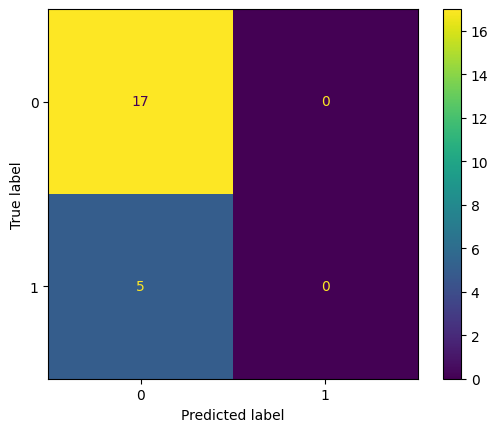

In [21]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = cm)
conf_matrix.plot()
plt.show()

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8636363636363636